<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀

이번 장에서는 다중 분류에서의 로지스틱 회귀 방법을 공부한다.

처음에 K-최근접 이웃 분류 방법을 사용하여 개별 확률을 알아보고,

이진 분류, 다중 분류에서의 로지스틱 회귀 방법을 공부하겠다.


## 데이터 준비

Species,Weight,Length,Diagonal,Height,Width **6가지 특성**을 가지는 

fish 데이터를 사용하며 첫 번째 특성인 **Species**를 **target_data**로 사용하여 분류를 진행한다.

**데이터 준비** 단계에서 **train_set**과 **test_set**을 나누고 **정규화**시켜 

모델링에 사용가능한 데이터를 만들어준다.

데이터는 'https://bit.ly/fish_csv'를 가져와서 사용하겠다.

In [1]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(fish.Species.unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
print(fish.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB
None


In [4]:
x=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(x[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
y=fish['Species'].to_numpy()
print(y[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


설명변수와 목적변수로 나눈 후 train_set과 test_set으로 나눠준다.

**sklearn.model_selection**에 있는 **train_test_split**을 사용한다.

나눈 후 **sklearn.preprocessing**의 **StandardScaler**로 **정규화**를 진행한다. 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

print(x_train.shape,x_test.shape)

(119, 5) (40, 5)


In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)

## K-최근접 이웃 분류를 사용한 확률 예측

**로지스틱 회귀**를 쓰기 전 이전에 배웠던 **K-최근접 이웃 분류**를 사용하여 
확률을 계산해본다. 

**K-최근접 이웃 분류**에서의 확률은 거리기반으로 가장 가까운 이웃그룹간의 확률이기 때문에 

초기 **n-neighbors**로 설정한 값에 따라 **확률값이 고정**되어있다. 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)
print('train_set의 점수 : ',kn.score(x_train,y_train))
print('test_set의 점수 : ',kn.score(x_test,y_test))

train_set의 점수 :  0.8907563025210085
test_set의 점수 :  0.85


다중분류에서 타깃값을 숫자로 바꾸어 입력이 가능하지만, sklearn은 **문자열로 된** 타깃값 사용이 가능.

**kn.classes_** : 모델에 사용된 목적변수의 값을 알려주는 속성, 

sklearn의 모델에 전달되면 순서가 자동으로 **Alphabet 순**으로 매겨진다.



In [9]:
print(kn.classes_)
print('\n')
print(kn.predict(x_test[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


출력시 반올림을 하기 위해 **numpy**의 **round함수**를 사용하였다.

옵션으로 **'decimals=n'**은 소수점 n자리까지 표기를 하며 **n+1자리에서 반올림**을 한다.

In [10]:
import numpy as np
prob=kn.predict_proba(x_test[:5])
print(np.round(prob,decimals=3))

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]]


위의 데이터를 보면 첫번째 열부터 각각 Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish에 

해당할 확률이며, 이는 **각 데이터가 이웃한 점들의 target 데이터 비율**이다.

In [11]:
distances,indexes=kn.kneighbors(x_test[:5])
print(y_train[indexes])

[['Perch' 'Perch' 'Perch']
 ['Smelt' 'Smelt' 'Smelt']
 ['Pike' 'Pike' 'Pike']
 ['Roach' 'Perch' 'Perch']
 ['Perch' 'Perch' 'Roach']]


예를들어 첫번째 행을 보면 Perch 확률이 1인데 이웃한 점들의 target을 보면 모두 Perch에 해당한다.

따라서 확률은 1로 주어지고, 네번째 행을 보면 Roach가 1개, Perch가 2개 이기때문에 

확률이 각각 0.333과 0.667로 주어진다.

이를 보아 확률은 n_neigbors의 값에따라 확률값의 공간이 고정된다.

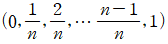 을 가지게된다.

##로지스틱 회귀 (이진분류)

**로지스틱 회귀**는 회귀분석으로 생각하여 예측 모델이라고 생각할 수 있지만, **분류모델**이다.

위 모델에서 선형회귀와 동일하게 

**Z=a\*(Weight)+b\*(Length)+c\*(Diagonal)+
d\*(Height)+e\*(Width)+f** 

표현될 수 있고(a,b,c,d,e는 가중치,f는 절편), Z는 어떠한 값도 가능하다.

하지만 이를 확률로써 표현하기 위해 

이진분류에서는 **Sigmoid 함수**를 사용하여 변환하고,


다중분류에서는 **Softmax 함수**를 사용하여 변환한다.




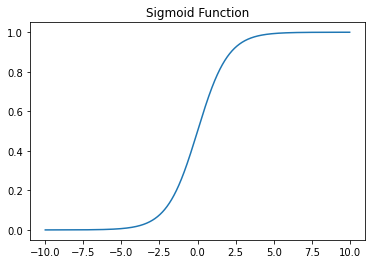

In [12]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-10,10,0.01)
fz=1/(1+np.exp(-z))
plt.plot(z,fz)
plt.title('Sigmoid Function')
plt.show()

먼저 로지스틱 회귀로 이진분류를 하기위해 **Boolean Indexing**을 활용하여

도미와 빙어 데이터만 사용하겠다.


In [13]:
bream_smelt=(y_train=='Bream')|(y_train=='Smelt')
x_train2=x_train[bream_smelt]
y_train2=y_train[bream_smelt]

print(y_train2[:5],np.unique(y_train2))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream'] ['Bream' 'Smelt']


로지스틱 회귀는 sklearn.linear_model의 **LogisticRegression**을 사용한다.

**predict_proba**를 사용하면 클래스 0(Bream)에 속할 확률과 클래스 1(Smelt)에 속할 확률을 보여준다.

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train2,y_train2)

print(lr.predict(x_train2[:5]))
print(lr.predict_proba(x_train2[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [15]:
print(lr.classes_)

['Bream' 'Smelt']


In [16]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


이 로지스틱 회귀 모델이 학습한 식은 

Z=-0.404\*(Weight)-0.576\*(Length)-0.663\*(Diagonal)-1.013\*(Height)-0.732\*(Width)-2.162 
와 같다.



LogisticRegression 클래스에서는 z값을 계산해주는 함수가 있다.

**decision_function()** 함수를 이용하면 z값을 계산해준다.

decision_function()함수를 사용하여 z값을 알아내고, 

z값을 Scipy에서 제공하는 시그모이드 함수 **expit()**를 사용하여 확률값을 계산하겠다.

In [17]:
z=lr.decision_function(x_train2[:5])
print(z)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [18]:
from scipy.special import expit
print(expit(z))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


결과값을 보면 predict_proba의 클래스 1 (Smelt)의 확률과 같다는 것을 보여준다.

이는 곧, LogisticRegression의 decision_funtion()함수는 

**양성 클래스(Class=1)에 대한 z값을 반환**함을 알 수 있다.

##로지스틱 회귀 (다중분류)

LogisticRegression 클래스는 기본적으로 반복 알고리즘을 사용한다.

회귀계수를 찾기위해 **MLE(최대우도법)** 을 사용하여 결과값을 최대로하는 값을 찾기 위함이다.

이에따라 LogisticRegression은 **max_iter**라는 매개변수를 제공하는데 기본값은 **100**이다.

또한 Ridge회귀, Lasso회귀와 마찬가지로 규제가 존재하는데, 기본적으로 Ridge회귀와 동일하게 

계수의 제곱을 규제한다. 이를 **L2 규제**라 한다.

매개변수로 **C**를 사용하며 기본값은 **1**이며 

**C값이 커지면 규제가 완화되고**, **C값이 작아짐에 따라 규제가 강화된다**.

In [19]:
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(x_train,y_train)
print('train_set의 점수 : ',lr.score(x_train,y_train))
print('test_set의 점수 : ',lr.score(x_test,y_test))

train_set의 점수 :  0.9327731092436975
test_set의 점수 :  0.925


In [20]:
print(lr.predict(x_test[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [21]:
prob=lr.predict_proba(x_test[:5])
print(np.round(prob,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞에서 학습한 것과 마찬가지로 lr.classes_는 각 클래스(target 데이터)들을 

알파벳 순으로 정렬해서 학습을 진행한다.



In [22]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


이진분류와는 다르게 lr.coef_에는 각 클래스마다 z값을 계산하는 계수와 절편이 다르다.

따라서 총 7개의 클래스를 구해주는 계수,절편을 통해 7\*5,7\*1의 모양을 가진다.



In [23]:
print(lr.coef_,lr.intercept_,'\n',lr.coef_.shape)

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]] [-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712] 
 (7, 5)


z값을 알아내고 이를 확률로 계산하기 위해 이진분류에서는 **Sigmoid 함수**를 사용했다.

다중분류에서는 z값을 계산하기위해 **Softmax 함수**를 사용해서 확률로 변환시킨다.

**Softmax 함수**는 클래스가 위의 모형과 같이 7개가 있다고하면,

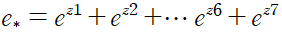
(단, 각 zn은 클래스를 의미) 로 나타낼 수 있으며, 

확률은 아래와 같이 나타낼 수 있다. 

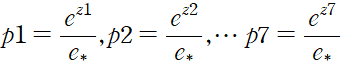
(단, 각 pn은 zn의 확률)

이진분류에서도 마찬가지로 LogisticRegression의 **decision_function**을 사용하여

z값을 구하여 scipy에서 제공하는 **softmax**함수를 사용하여 확률을 구해보겠다.

In [24]:
z=lr.decision_function(x_test[:5])
print(np.round(z,decimals=3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.326  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [25]:
from scipy.special import softmax
prob=softmax(z,axis=1)
print(np.round(prob,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
